In [402]:
#pdf to text converting
from tika import parser

data = parser.from_file(r'C:\Users\Yunseok Choi\Downloads\TP Articles for LDA\AI governance in the public sector.pdf')
content = data["content"].strip()

content

'AI governance in the public sector: Three tales from the frontiers of automated decision-making in democratic settings\n\n\nTelecommunications Policy 44 (2020) 101976\n\nAvailable online 17 April 2020\n0308-5961/© 2020 Elsevier Ltd. All rights reserved.\n\nAI governance in the public sector: Three tales from the frontiers \nof automated decision-making in democratic settings \n\nMaciej Kuziemski a, Gianluca Misuraca b,* \n\na Berkman Klein Center for Internet and Society, Harvard University, Cambridge, MA, USA \nb European Commission, Joint Research Centre, Digital Economy Unit, Seville, Spain   \n\nA R T I C L E  I N F O   \n\nKeywords: \nArtificial intelligence \nPublic sector innovation \nAutomated decision making \nAlgorithmic accountability \n\nA B S T R A C T   \n\nThe rush to understand new socio-economic contexts created by the wide adoption of AI is \njustified by its far-ranging consequences, spanning almost every walk of life. Yet, the public \nsector’s predicament is a tra

In [535]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from gensim.corpora.dictionary import Dictionary
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
wnl = WordNetLemmatizer()

## Preprocessing the text data

In [606]:
path = r'C:\Users\Yunseok Choi\Downloads\TP Articles for LDA'
text_list = os.listdir(path)

In [607]:
#txt 파일 불러오기 및 저장
cps_list = []
cps_name = []
for i in range(12):
    globals()['cps{}'.format(i+1)] = open(path+'\\'+text_list[i], encoding='utf8').read().lower().replace('\n', ' ')
    cps_name.append('cps{}'.format(i+1))
    cps_list.append(globals()['cps{}'.format(i+1)])

In [608]:
#Corpus별 표제어(lemmatization) 추출
tokenizer = RegexpTokenizer('\w+')
p_stemmer = PorterStemmer()
texts = []
for item in cps_list:
    #corpus 속 숫자 제거
    temp = re.sub('[0-9]+','',item)
    tokens = tokenizer.tokenize(temp)
    #stopword 제거
    stopped_tokens = [i for i in tokens if not i in stword]
    #각 단어 표제화
    lemmatized_words = [wnl.lemmatize(i) for i in stopped_tokens]
    texts.append(lemmatized_words)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\YUNSEO~1\AppData\Local\Temp/ipykernel_3240/1336025661.py:2: DeprecationWarning: invalid escape sequence \w
  tokenizer = RegexpTokenizer('\w+')


In [610]:
#set(texts[0])

In [611]:
stword = stopwords.words('english')
#Stopword 추가
stword_add = ['one','two','three','four','five','six','seven','eight','nine','ten', 'increasing','decreasing',
              'half','must','say','said','able','therefore','higher','lower','better','asking','largerst','smallest','come',
             'th','highest','lowest','whatever','help','v','c','high','low','iii','i','ii','iv','v','vi','vii','viii','every',
             'first','second','third','fourth','fifth','sixth','seventh','eighth', 'also', 'table', 'fig']
stword.extend(stword_add)

In [612]:
#업데이트된 stopwords를 이용하여 corpus 표제화
tokenizer = RegexpTokenizer('\w+')
p_stemmer = PorterStemmer()
texts = []
for item in cps_list:
    temp = re.sub('[0-9]+','',item)
    tokens = tokenizer.tokenize(temp)
    stopped_tokens = [i for i in tokens if not i in stword]
    lemmatized_words = [wnl.lemmatize(i) for i in stopped_tokens]
    texts.append(lemmatized_words)

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
C:\Users\YUNSEO~1\AppData\Local\Temp/ipykernel_3240/1103583192.py:2: DeprecationWarning: invalid escape sequence \w
  tokenizer = RegexpTokenizer('\w+')


In [613]:
frequency = {}
for corpus in texts:
    for word in corpus:
        if word in frequency.keys():
            frequency[word] +=1
        else:
            frequency[word] = 1

texts = [ [token for token in text if frequency[token] > 1] for text in texts ]

In [614]:
#표제화된 단어들을 이용하여 document-term 테이블 생성
dictionary = Dictionary(texts)
docfreq = dictionary.dfs
doc_term_matrix = [dictionary.doc2bow(i) for i in texts]

## LSI from gensim

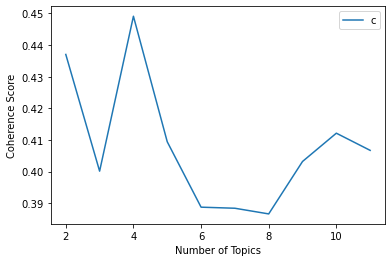

In [486]:
#토픽의 개수별 gensim lsi 모델의 coherence score 체크
coherence_values = []
model_list = []
for n_topics in range(2,12,1):
    model = models.LsiModel(doc_term_matrix, num_topics = n_topics, id2word = dictionary)
    model_list.append(model)
    coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
x = range(2,12,1)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'),loc = 'best')
plt.show()

In [615]:
#2개의 토픽으로 LSI모델 구현
num_tps = 2
lsiModel = models.LsiModel(doc_term_matrix, num_topics = n_topics, id2word = dictionary)
lsiTopics = lsiModel.print_topics(num_topics = num_tps, num_words = 5)
print(lsiTopics)

[(0, '0.659*"ai" + 0.161*"technology" + 0.149*"china" + 0.144*"agent" + 0.138*"human"'), (1, '0.521*"agent" + 0.372*"activity" + 0.190*"topic" + 0.175*"firm" + 0.172*"collaboration"')]


In [594]:
#4개의 토픽으로 LSI모델 구현
num_tps = 4
lsiModel = models.LsiModel(doc_term_matrix, num_topics = n_topics, id2word = dictionary)
lsiTopics = lsiModel.print_topics(num_topics = num_tps, num_words = 5)
print(lsiTopics)

[(0, '0.659*"ai" + 0.161*"technology" + 0.149*"china" + 0.144*"agent" + 0.138*"human"'), (1, '0.521*"agent" + 0.372*"activity" + 0.190*"topic" + 0.175*"firm" + 0.172*"collaboration"'), (2, '-0.427*"china" + -0.297*"ecosystem" + 0.288*"human" + -0.228*"innovation" + -0.181*"company"'), (3, '0.382*"network" + 0.343*"ai" + -0.224*"human" + -0.212*"quantum" + -0.199*"technology"')]


## LDA from gensim (optional)

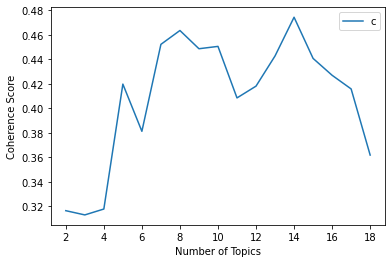

In [575]:
#토픽의 개수별 gensim LDA 모델의 coherence score 체크
coherence_values = []
model_list = []
for n_topics in range(2,19,1):
    model = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics = n_topics, id2word = dictionary, 
                                     passes=15, alpha = 'symmetric', iterations = 10)
    model_list.append(model)
    coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())
    
x = range(2,19,1)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'),loc = 'best')
plt.show()

In [595]:
#5개의 토픽으로 LSI모델 구현
num_tps = 5
ldaModel = models.ldamodel.LdaModel(corpus=doc_term_matrix, num_topics = num_tps, id2word = dictionary, 
                                    passes=15, alpha = 'symmetric', iterations = 10)
ldaTopics = ldaModel.print_topics(num_topics = num_tps, num_words = 5)
print(ldaTopics)

[(0, '0.026*"ai" + 0.009*"public" + 0.009*"technology" + 0.008*"system" + 0.008*"data"'), (1, '0.036*"ai" + 0.013*"network" + 0.013*"quantum" + 0.012*"firm" + 0.009*"agent"'), (2, '0.023*"human" + 0.012*"ai" + 0.011*"weapon" + 0.011*"system" + 0.010*"technology"'), (3, '0.021*"ai" + 0.013*"china" + 0.012*"agent" + 0.012*"activity" + 0.009*"technology"'), (4, '0.037*"ai" + 0.013*"law" + 0.013*"ethical" + 0.013*"legal" + 0.011*"principle"')]


In [596]:
#각 논문별 토픽 유사도 검증
for i in range(len(doc_term_matrix)):
    print(ldaModel[doc_term_matrix[i]])

[(0, 0.9670946), (1, 0.013652271), (3, 0.012074022)]
[(0, 0.6288534), (1, 0.14906068), (2, 0.031261794), (3, 0.14227), (4, 0.04855415)]
[(0, 0.010469179), (1, 0.9816444)]
[(4, 0.98273003)]
[(2, 0.97848916)]
[(0, 0.8591977), (1, 0.041265957), (3, 0.07914783), (4, 0.013060966)]
[(0, 0.118664004), (1, 0.02360564), (3, 0.8492495)]
[(0, 0.10954554), (1, 0.83800936), (3, 0.033430353), (4, 0.014354547)]
[(0, 0.011115825), (1, 0.014508327), (2, 0.03214503), (3, 0.9242272), (4, 0.018003637)]
[(0, 0.95609236), (2, 0.014275321), (4, 0.018476859)]
[(3, 0.99611825)]
[(1, 0.95880544), (3, 0.028586427)]


In [559]:
#LDA 결과 시각화
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldaModel, corpus=doc_term_matrix, dictionary = ldaModel.id2word)
#pyLDAvis.save_html(vis, 'data/cIass_sample.htmI’)
pyLDAvis.display(vis)

C:\Users\Yunseok Choi\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


## SVD from scikit-learn

In [616]:
#Detokenize
for i in range(len(texts)):
    texts[i] = ' '.join(x for x in texts[i])

In [617]:
#Unigran Matrix 생성
cps2vec = CountVectorizer(ngram_range=(1, 1))
unigram = cps2vec.fit_transform(texts)
unigramdtx = pd.DataFrame(unigram.toarray(), index=cps_name,
                         columns = cps2vec.get_feature_names())
#unigramdtx

In [618]:
tfidf_uni = TfidfVectorizer(stop_words={'english'}).fit(unigramdtx)
tfidf_unidf = pd.DataFrame(tfidf_uni.transform(texts).toarray(),index=cps_name,
                        columns = tfidf_uni.get_feature_names()) # document-term matrix
#tfidf_unidf

In [624]:
corpusLsa =  TruncatedSVD(5)
dtm_lsa =  corpusLsa.fit_transform(tfidf_unidf)
dtm_lsa1 =  Normalizer(copy=False).fit_transform(dtm_lsa)
#U-matrix formation (topic term patrix)
pd.DataFrame(corpusLsa.components_, index = ['topic1','topic2','topic3','topic4','topic5'], columns = tfidf_uni.get_feature_names())

,abandoned,ability,abroad,absence,absent,absolute,abstract,abstraction,abuse,academia,...,york,young,yudkowsky,zhang,zhao,zhou,zone,zte,zuboff,ágreda
topic1,0.001055,0.011407,0.001903,0.005198,0.000618,0.001835,0.005951,0.000904,0.002255,0.008955,...,0.000973,0.001297,0.000796,0.003260,0.000810,0.001172,0.001162,0.000586,0.000939,0.001524
topic2,-0.001491,0.008327,-0.003560,-0.000163,0.005925,-0.001147,0.004304,0.000518,-0.000915,0.007119,...,0.001796,-0.000956,0.000241,-0.006156,-0.002156,-0.002216,0.000686,-0.001108,0.001157,-0.000888
topic3,-0.001182,-0.005989,0.003554,0.000967,0.004881,-0.001979,0.008425,-0.001734,-0.000347,-0.009769,...,-0.000825,0.000408,-0.000416,0.001290,0.004487,-0.001536,0.000897,-0.000768,-0.001280,-0.001399
topic4,0.001162,-0.006765,0.002782,0.008063,0.002961,0.000756,0.003902,-0.000648,-0.000819,-0.006729,...,-0.001830,0.000764,-0.001657,-0.000350,0.000987,0.002037,-0.000847,0.001018,-0.001239,-0.000693
topic5,-0.001650,-0.000872,0.002250,-0.001319,-0.005174,-0.000751,0.001680,0.003808,-0.000679,0.008803,...,0.002784,0.001762,-0.000889,-0.006048,0.002632,-0.001973,0.000990,-0.000987,0.003296,-0.003527


In [631]:
pd.DataFrame(dtm_lsa.round(2), index = cps_name, columns = ['topic1','topic2','topic3','topic4','topic5']).transpose()

,cps1,cps2,cps3,cps4,cps5,cps6,cps7,cps8,cps9,cps10,cps11,cps12
topic1,0.88,0.95,0.86,0.95,0.78,0.97,0.90,0.57,0.39,0.88,0.57,0.84
topic2,0.09,-0.08,-0.32,0.05,0.54,-0.15,-0.32,0.07,0.69,0.30,-0.36,-0.29
topic3,-0.25,-0.13,-0.00,-0.07,-0.01,-0.13,-0.17,-0.34,0.45,-0.11,0.60,0.45
topic4,-0.08,-0.10,-0.20,-0.26,-0.21,0.04,0.21,0.74,0.24,-0.22,0.22,-0.10
topic5,0.39,-0.27,-0.35,-0.11,0.25,-0.14,-0.16,0.08,-0.34,0.26,0.36,-0.02


In [626]:
for idx, topic in enumerate(corpusLsa.components_):
    print("Topic %d:" % (idx+1), [(tfidf_uni.get_feature_names()[i], topic[i].round(5)) for i in topic.argsort()[:-5 -1:-1]])

Topic 1: [('ai', 0.63932), ('human', 0.20087), ('technology', 0.19414), ('system', 0.12997), ('data', 0.11683)]
Topic 2: [('human', 0.44706), ('work', 0.23748), ('question', 0.21939), ('meaning', 0.19116), ('technology', 0.16969)]
Topic 3: [('agent', 0.45645), ('activity', 0.29105), ('firm', 0.24826), ('work', 0.21399), ('question', 0.17134)]
Topic 4: [('quantum', 0.58074), ('technology', 0.2089), ('national', 0.16405), ('work', 0.14986), ('policy', 0.14369)]
Topic 5: [('system', 0.25639), ('agent', 0.24715), ('decision', 0.17873), ('public', 0.17471), ('data', 0.17032)]


In [636]:
#documents similarity using LSA
similarity = np.asarray(np.asmatrix(dtm_lsa).dot(np.asmatrix(dtm_lsa).T))
similaritydf = pd.DataFrame(similarity, index=cps_name, columns=cps_name)
#similaritydf
similaritydf[similaritydf > 0.1].round(2).fillna('')

,cps1,cps2,cps3,cps4,cps5,cps6,cps7,cps8,cps9,cps10,cps11,cps12
cps1,1.00,0.76,0.60,0.84,0.85,0.81,0.72,0.56,0.14,0.95,0.44,0.60
cps2,0.76,1.00,0.95,0.96,0.64,0.98,0.92,0.49,0.32,0.77,0.38,0.78
cps3,0.60,0.95,1.00,0.89,0.44,0.92,0.88,0.30,0.17,0.61,0.43,0.84
cps4,0.84,0.96,0.89,1.00,0.80,0.93,0.81,0.38,0.35,0.89,0.39,0.78
cps5,0.85,0.64,0.44,0.80,1.00,0.63,0.44,0.35,0.53,0.96,0.29,0.51
cps6,0.81,0.98,0.92,0.93,0.63,1.00,0.97,0.61,0.27,0.78,0.49,0.80
cps7,0.72,0.92,0.88,0.81,0.44,0.97,1.00,0.69,0.15,0.63,0.51,0.75
cps8,0.56,0.49,0.30,0.38,0.35,0.61,0.69,1.00,0.27,0.42,0.29,0.23
cps9,0.14,0.32,0.17,0.35,0.53,0.27,0.15,0.27,1.00,0.36,0.18,0.31
cps10,0.95,0.77,0.61,0.89,0.96,0.78,0.63,0.42,0.36,1.00,0.38,0.62
